 #  A Whale off the Port(folio)
 ---

Evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports.
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

Read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Using the Pathlib libary to set the path to the Whale Returns CSV.
whale_returns_path = Path('Resources/whale_returns.csv')

In [3]:
# Reading whale returns.
whale_returns_df = pd.read_csv(whale_returns_path)
whale_returns_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,3/2/2015,NaN,NaN,NaN,NaN
1,3/3/2015,-0.001266,-0.004981,-0.000496,-0.006569
2,3/4/2015,0.002230,0.003241,-0.002534,0.004213
3,3/5/2015,0.004016,0.004076,0.002355,0.006726
4,3/6/2015,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Counting nulls.
whale_returns_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Dropping nulls.
whale_returns_df.dropna(inplace=True)
whale_returns_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,3/3/2015,-0.001266,-0.004981,-0.000496,-0.006569
2,3/4/2015,0.002230,0.003241,-0.002534,0.004213
3,3/5/2015,0.004016,0.004076,0.002355,0.006726
4,3/6/2015,-0.007905,-0.003574,-0.008481,-0.013098
5,3/9/2015,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,4/25/2019,-0.000285,-0.001291,-0.005153,0.004848
1056,4/26/2019,0.008149,0.009162,0.012355,0.010434
1057,4/29/2019,0.001254,0.002719,0.006251,0.005223
1058,4/30/2019,-0.001295,-0.002211,-0.000259,-0.003702


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Using the Pathlib libary to set the path to the Algorithmic Daily Returns CSV.
algo_returns_path = Path('Resources/algo_returns.csv')

In [7]:
# Reading algorithmic returns.
algo_returns_df = pd.read_csv(algo_returns_path)
algo_returns_df.head()

,Date,Algo 1,Algo 2
0,5/28/2014,0.001745,NaN
1,5/29/2014,0.003978,NaN
2,5/30/2014,0.004464,NaN
3,6/2/2014,0.005692,NaN
4,6/3/2014,0.005292,NaN


In [8]:
# Counting nulls.
algo_returns_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Dropping nulls.
algo_returns_df.dropna(inplace=True)
algo_returns_df

,Date,Algo 1,Algo 2
6,6/5/2014,0.004062,0.013285
7,6/6/2014,0.001857,0.008284
8,6/9/2014,-0.005012,0.005668
9,6/10/2014,0.004406,-0.000735
10,6/11/2014,0.004760,-0.003761
...,...,...,...
1236,4/25/2019,0.000682,-0.007247
1237,4/26/2019,0.002981,0.005256
1238,4/29/2019,0.005208,0.002829
1239,4/30/2019,-0.002944,-0.001570


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Using the Pathlib libary to set the path to the S&P 500 Returns CSV.
sp500_history_path = Path('Resources/sp500_history.csv')

In [11]:
# Reading S&P 500 Closing Prices.
sp500_history_df = pd.read_csv(sp500_history_path)
sp500_history_df.head()

,Date,Close
0,23-Apr-19,"$2,933.68"
1,22-Apr-19,"$2,907.97"
2,18-Apr-19,"$2,905.03"
3,17-Apr-19,"$2,900.45"
4,16-Apr-19,"$2,907.06"


In [12]:
# Checking Whale Returns Data Types.
whale_returns_df.dtypes

Date                            object
SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [13]:
# Checking Algo Returns Data Types.
algo_returns_df.dtypes

Date       object
Algo 1    float64
Algo 2    float64
dtype: object

In [14]:
# Checking S&P 500 History Data Types.
sp500_history_df.dtypes

Date     object
Close    object
dtype: object

In [15]:
# Fixing Whale Returns Data Types.
whale_returns_df.set_index(pd.to_datetime(whale_returns_df['Date'], infer_datetime_format=True), inplace=True)
whale_returns_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-03,3/3/2015,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,3/4/2015,0.002230,0.003241,-0.002534,0.004213
2015-03-05,3/5/2015,0.004016,0.004076,0.002355,0.006726
2015-03-06,3/6/2015,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,3/9/2015,0.000582,0.004225,0.005843,-0.001652


In [16]:
# Dropping the extra date column in Whale Returns.
whale_returns_df.drop(columns=['Date'], inplace=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [17]:
# Fixing Algo Returns Data Types.
algo_returns_df.set_index(pd.to_datetime(algo_returns_df['Date'], infer_datetime_format=True), inplace=True)
algo_returns_df.head()

,Date,Algo 1,Algo 2
Date,,,
2014-06-05,6/5/2014,0.004062,0.013285
2014-06-06,6/6/2014,0.001857,0.008284
2014-06-09,6/9/2014,-0.005012,0.005668
2014-06-10,6/10/2014,0.004406,-0.000735
2014-06-11,6/11/2014,0.004760,-0.003761


In [18]:
# Dropping the extra date column in Algo Returns.
algo_returns_df.drop(columns=['Date'], inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [19]:
# Fixing S&P 500 History Data Types.
sp500_history_df.set_index(pd.to_datetime(sp500_history_df['Date'], infer_datetime_format=True), inplace=True)
sp500_history_df.head()

,Date,Close
Date,,
2019-04-23,23-Apr-19,"$2,933.68"
2019-04-22,22-Apr-19,"$2,907.97"
2019-04-18,18-Apr-19,"$2,905.03"
2019-04-17,17-Apr-19,"$2,900.45"
2019-04-16,16-Apr-19,"$2,907.06"


In [20]:
# Dropping the extra date column in S&P 500 History.
sp500_history_df.drop(columns=['Date'], inplace=True)
sp500_history_df.head()

,Close
Date,
2019-04-23,"$2,933.68"
2019-04-22,"$2,907.97"
2019-04-18,"$2,905.03"
2019-04-17,"$2,900.45"
2019-04-16,"$2,907.06"


In [21]:
# Fixing S&P 500 History Data Types.
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace("$", "", regex=False).str.replace(",", "", regex=False).astype(float)
sp500_history_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [22]:
# Calculating Daily Returns from S&P 500 History Dataframe.
sp500_returns_df = sp500_history_df['Close'].pct_change().to_frame()
sp500_returns_df.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [23]:
# Dropping nulls.
sp500_returns_df.dropna(inplace=True)
sp500_returns_df.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [24]:
# Renaming `Close` Column to be specific to the S&P 500 Returns portfolio.
sp500_returns_df = sp500_returns_df.rename(columns={'Close':'S&P500'})
sp500_returns_df.head()

,S&P500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [25]:
# Joining Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_portfolio_returns = pd.concat([whale_returns_df, algo_returns_df, sp500_returns_df], axis="columns", join="inner")
joined_portfolio_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

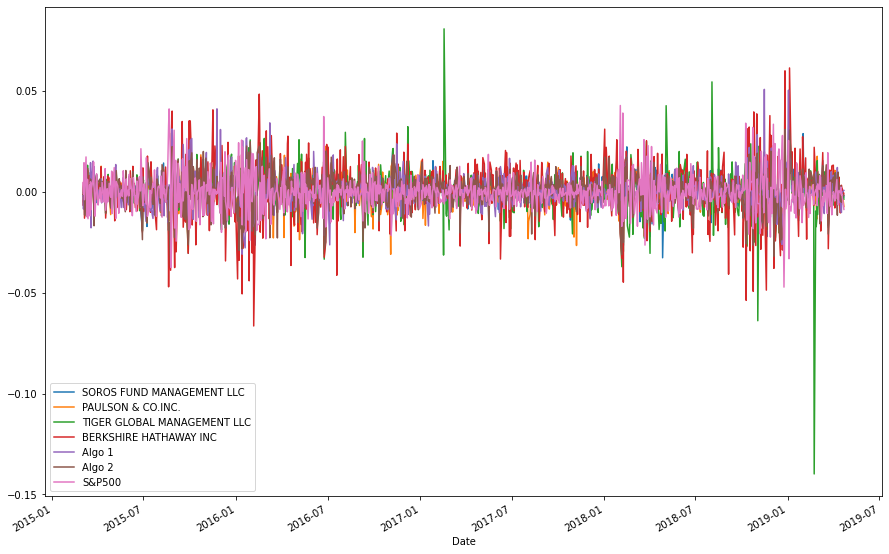

In [26]:
# Plotting daily returns of all portfolios.
joined_portfolio_returns.plot(figsize=(15,10));

#### Calculate and Plot cumulative returns.

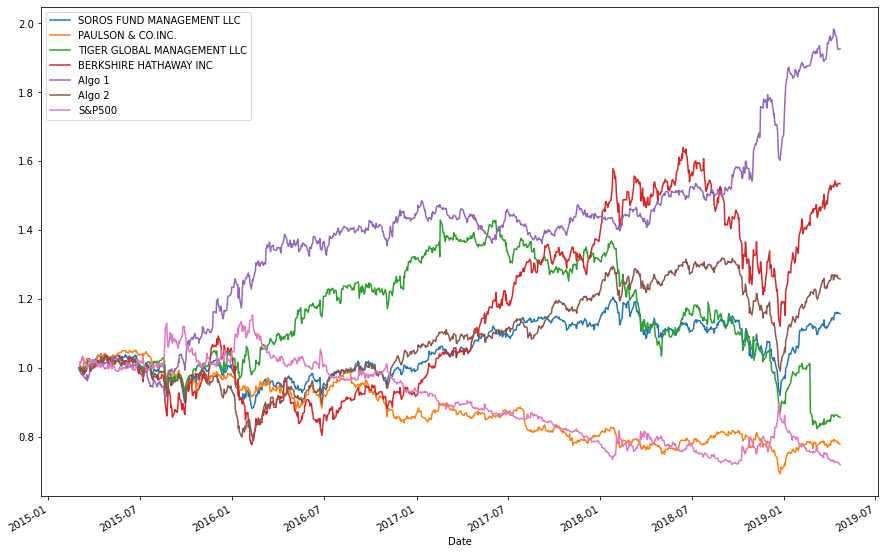

In [27]:
# Calculating cumulative returns of all portfolios.
cumulative_returns = (1 + joined_portfolio_returns).cumprod()

# Plotting cumulative returns.
cumulative_returns.plot(figsize=(15,10));

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


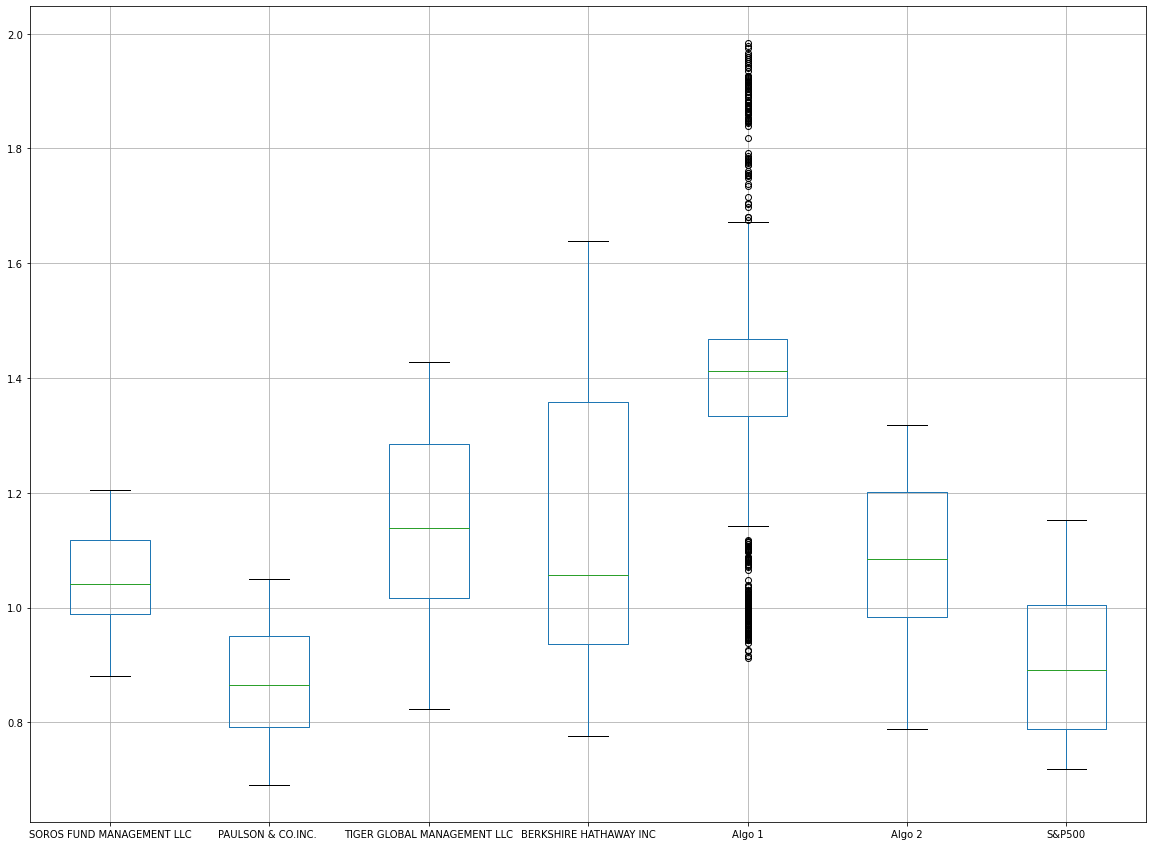

In [28]:
# Box plotting to visually show risk.
cumulative_returns.boxplot(figsize=(20,15));

### Calculate Standard Deviations

In [29]:
# Calculating the daily standard deviations of all portfolios.
joined_portfolio_std = joined_portfolio_returns.std()
joined_portfolio_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P500                         0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [30]:
# Calculating the daily standard deviation of S&P 500.
sp500_sd = round(float(joined_portfolio_returns['S&P500'].std()),6)
sp500_sd

0.008587

In [31]:
# Determining which portfolios are riskier than the S&P 500.
joined_portfolio_std = joined_portfolio_std.sort_values(ascending=False)
joined_portfolio_std.head()

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P500                         0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
dtype: float64

### Calculate the Annualized Standard Deviation

In [32]:
# Calculate the annualized standard deviation (252 trading days).
joined_portfolio_annualized_std = joined_portfolio_std * np.sqrt(252)
joined_portfolio_annualized_std = joined_portfolio_annualized_std.sort_values(ascending=False)
joined_portfolio_annualized_std

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
S&P500                         0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

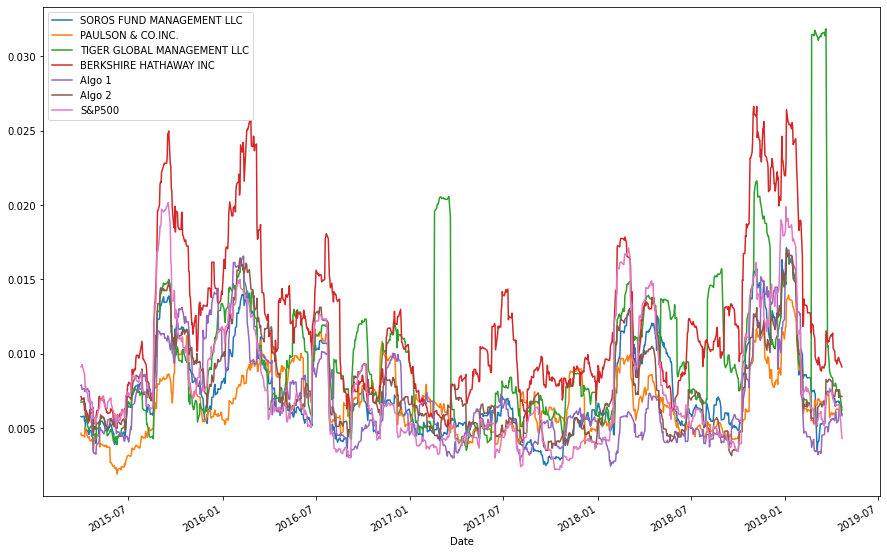

In [33]:
# Calculating the rolling standard deviation for all portfolios using a 21-day window.
jpr_rolling_21day_std = joined_portfolio_returns.rolling(window=21).std()

# Plotting the rolling standard deviation.
jpr_rolling_21day_std.plot(figsize=(15,10));

### Calculate and plot the correlation

In [34]:
# Calculating the correlation.
jpr_correlation = joined_portfolio_returns.corr()
jpr_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


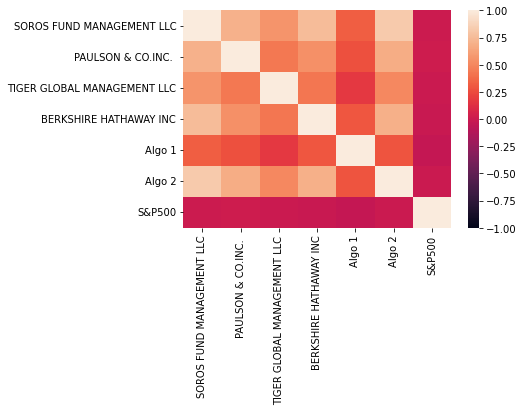

In [35]:
# Displaying the correlation matrix.
sns.heatmap(jpr_correlation, vmin=-1, vmax=1);

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [36]:
# Calculating covariance of a single portfolio.
tiger_sp500_covariance = joined_portfolio_returns['TIGER GLOBAL MANAGEMENT LLC'].cov(joined_portfolio_returns['S&P500'])
tiger_sp500_covariance

-1.4081155810777138e-07

In [37]:
# Calculating variance of S&P 500.
sp500_variance = joined_portfolio_returns['S&P500'].var()
sp500_variance

7.373467552840441e-05

In [38]:
# Computing beta.
tiger_beta = tiger_sp500_covariance / sp500_variance
tiger_beta

-0.0019097060792452704

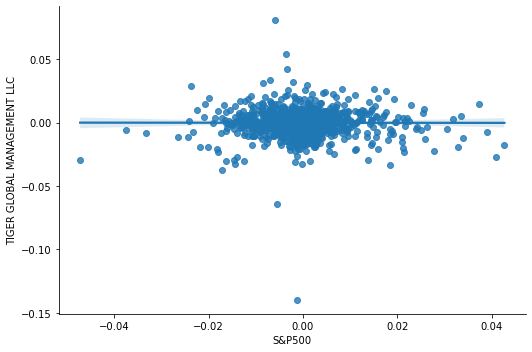

In [39]:
# Plotting beta trend.
sns.lmplot(x='S&P500', y='TIGER GLOBAL MANAGEMENT LLC', data=joined_portfolio_returns, aspect=1.5, fit_reg=True);

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [40]:
# Using `ewm` to calculate the rolling window.
jpr_ewm = joined_portfolio_returns.ewm(halflife=21).mean()
jpr_ewm

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,0.001560
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,0.005975
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,0.003375
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,0.006337
...,...,...,...,...,...,...,...
2019-04-15,0.001439,0.000450,-0.000813,0.001896,0.001175,0.001313,-0.001290
2019-04-16,0.001480,0.000448,-0.000813,0.001862,0.000912,0.001364,-0.001174
2019-04-17,0.001338,0.000223,-0.000930,0.001906,0.000548,0.001150,-0.001187


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [41]:
# Using the Pathlib libary to set the path to the Risk Free Rate CSV.
risk_free_rate_path = Path('Resources/risk_free_rate.csv')

In [42]:
# Reading risk free rate.
risk_free_rate_df = pd.read_csv(risk_free_rate_path)
risk_free_rate_df.head()

,Date,rf_rate
0,1/4/1954,0.000148
1,1/5/1954,0.000142
2,1/6/1954,0.000142
3,1/7/1954,0.000146
4,1/8/1954,0.000146


In [43]:
# Counting nulls.
risk_free_rate_df.isnull().sum()

Date       0
rf_rate    0
dtype: int64

In [44]:
# Checking Risk Free Rate Data Types.
risk_free_rate_df.dtypes

Date        object
rf_rate    float64
dtype: object

In [45]:
# Fixing Risk Free Rate Data Types.
risk_free_rate_df.set_index(pd.to_datetime(risk_free_rate_df['Date'], infer_datetime_format=True), inplace=True)
risk_free_rate_df.head()

,Date,rf_rate
Date,,
1954-01-04,1/4/1954,0.000148
1954-01-05,1/5/1954,0.000142
1954-01-06,1/6/1954,0.000142
1954-01-07,1/7/1954,0.000146
1954-01-08,1/8/1954,0.000146


In [46]:
# Dropping the extra date column in Risk Free Rate.
risk_free_rate_df.drop(columns=['Date'], inplace=True)
risk_free_rate_df.head()

,rf_rate
Date,
1954-01-04,0.000148
1954-01-05,0.000142
1954-01-06,0.000142
1954-01-07,0.000146
1954-01-08,0.000146


In [47]:
# Joining All Portfolios Returns, the S&P 500 Returns, and the Risk Free Rate into a single DataFrame with columns for each portfolio's returns.
jpr_with_rf_rate = pd.concat([joined_portfolio_returns, risk_free_rate_df], axis="columns", join="inner")
jpr_with_rf_rate

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,rf_rate
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,0.000002
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,0.000001
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.000002
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,0.000001
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,0.000002
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.000264
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.000264
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.000266


In [48]:
# Calculating annualized Sharpe Ratios
jpr_sharpe_ratios = ((jpr_with_rf_rate.mean()-jpr_with_rf_rate['rf_rate'].mean()) * 252) / (jpr_with_rf_rate.std() * np.sqrt(252))
jpr_sharpe_ratios = jpr_sharpe_ratios.sort_values(ascending=False)
jpr_sharpe_ratios

Algo 1                         1.138812
BERKSHIRE HATHAWAY INC         0.506336
Algo 2                         0.297259
SOROS FUND MANAGEMENT LLC      0.190405
rf_rate                        0.000000
TIGER GLOBAL MANAGEMENT LLC   -0.289644
PAULSON & CO.INC.             -0.710554
S&P500                        -0.779210
dtype: float64

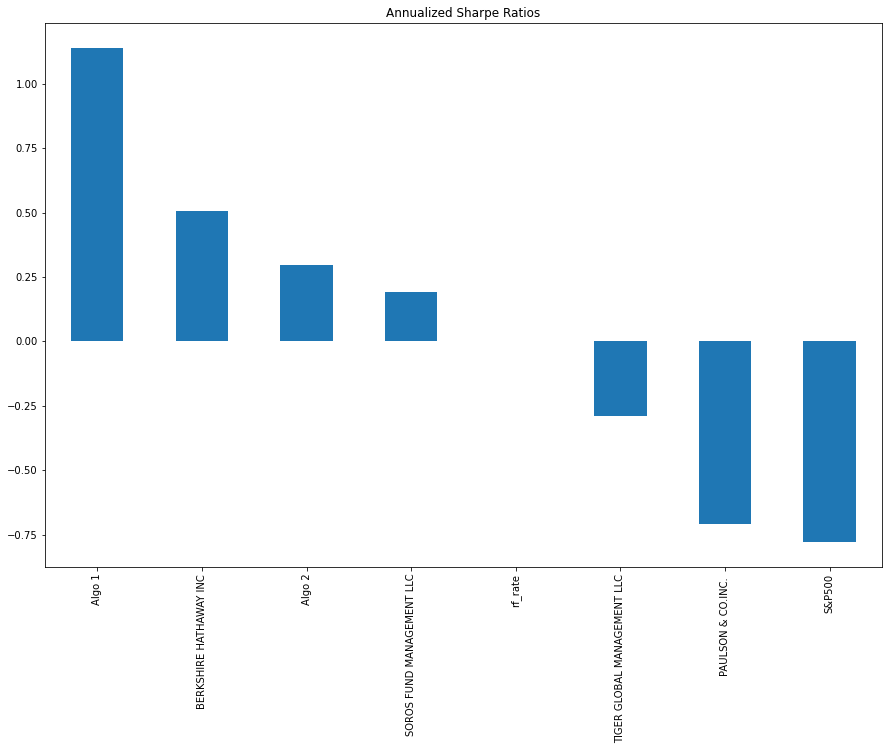

In [49]:
# Visualizing the sharpe ratios as a bar plot.
jpr_sharpe_ratios.plot(figsize=(15,10), kind="bar", title="Annualized Sharpe Ratios");

In [50]:
# Calculating the average return.
joined_portfolio_returns.mean().sort_values(ascending=False)*100

Algo 1                         0.065766
BERKSHIRE HATHAWAY INC         0.049377
Algo 2                         0.025449
SOROS FUND MANAGEMENT LLC      0.017056
TIGER GLOBAL MANAGEMENT LLC   -0.008937
PAULSON & CO.INC.             -0.021749
S&P500                        -0.028051
dtype: float64

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

When looking at the sharpe ratios for the algorithmic strategies (Algo 1 and Algo 2) and comparing them to the S&P 500 martket, we have determined that both strategies outperform the overall S&P 500 market. Both algo strategies have a higher sharpe ratio than the S&P 500, which means that for the amount of volitility risk (standard deviation) when investing in these portfolios, the algo strategies are generating higher annualized return, after we factor in the risk free rate.

Also, when comparing the algorithmic strategies against the Whale Portfolios, Algo 1 outperforms all portfolios, and Algo 2 outperforms all except the Berkshire Hathaway portfolio. Both, the sharpe ratio, as well as, the average expected return are in line with this assumption based on the above data.

In general, based on this historical data, Harold's algorithmic strategies are both good strategies since they are generating good returns based on their volitility risk.

---

# Create Custom Portfolio

Build a custom portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join the custom portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [51]:
# Using the Pathlib libary to set the path to the Google Historical CSV.
google_historical_path = Path('Resources/goog_historical.csv')

In [52]:
# Reading data from 1st stock.
google_historical_df = pd.read_csv(google_historical_path)
google_historical_df.head()

,Symbol,Trade DATE,NOCP
0,GOOG,5/9/2019,1162.38
1,GOOG,5/8/2019,1166.27
2,GOOG,5/7/2019,1174.10
3,GOOG,5/6/2019,1189.39
4,GOOG,5/3/2019,1185.40


In [53]:
# Sorting by date in 1st stock.
google_historical_df.sort_values(by=['Trade DATE'], inplace=True, ascending=False)

In [54]:
# Renaming the Date column in 1st stock.
google_historical_df = google_historical_df.rename(columns={"Trade DATE": "Date"})
google_historical_df.head()

,Symbol,Date,NOCP
167,GOOG,9/7/2018,1164.83
168,GOOG,9/6/2018,1171.44
169,GOOG,9/5/2018,1186.48
170,GOOG,9/4/2018,1197.00
152,GOOG,9/28/2018,1193.47


In [55]:
# Resetting Date index for 1st stock.
google_historical_df.set_index(pd.to_datetime(google_historical_df['Date'], infer_datetime_format=True), inplace=True)
google_historical_df.head()

,Symbol,Date,NOCP
Date,,,
2018-09-07,GOOG,9/7/2018,1164.83
2018-09-06,GOOG,9/6/2018,1171.44
2018-09-05,GOOG,9/5/2018,1186.48
2018-09-04,GOOG,9/4/2018,1197.00
2018-09-28,GOOG,9/28/2018,1193.47


In [56]:
# Dropping the extra date column in 1st stock.
google_historical_df.drop(columns=['Date'], inplace=True)
google_historical_df.head()

,Symbol,NOCP
Date,,
2018-09-07,GOOG,1164.83
2018-09-06,GOOG,1171.44
2018-09-05,GOOG,1186.48
2018-09-04,GOOG,1197.00
2018-09-28,GOOG,1193.47


In [57]:
# Renaming the NOCP column in 1st stock.
google_historical_df = google_historical_df.rename(columns={"NOCP": "GOOG"})
google_historical_df.head()

,Symbol,GOOG
Date,,
2018-09-07,GOOG,1164.83
2018-09-06,GOOG,1171.44
2018-09-05,GOOG,1186.48
2018-09-04,GOOG,1197.00
2018-09-28,GOOG,1193.47


In [58]:
# Dropping the extra symbol column in 1st stock.
google_historical_df.drop(columns=['Symbol'], inplace=True)
google_historical_df.head()

,GOOG
Date,
2018-09-07,1164.83
2018-09-06,1171.44
2018-09-05,1186.48
2018-09-04,1197.00
2018-09-28,1193.47


In [59]:
# Using the Pathlib libary to set the path to the Apple Historical CSV.
apple_historical_path = Path('Resources/aapl_historical.csv')

In [60]:
# Reading data from 2nd stock.
apple_historical_df = pd.read_csv(apple_historical_path)
apple_historical_df.head()

,Symbol,Trade DATE,NOCP
0,AAPL,5/9/2019,200.72
1,AAPL,5/8/2019,202.90
2,AAPL,5/7/2019,202.86
3,AAPL,5/6/2019,208.48
4,AAPL,5/3/2019,211.75


In [61]:
# Sorting by date in 2nd stock.
apple_historical_df.sort_values(by=['Trade DATE'], inplace=True, ascending=False)

In [62]:
# Renaming the Date column in 2nd stock.
apple_historical_df = apple_historical_df.rename(columns={"Trade DATE": "Date"})
apple_historical_df.head()

,Symbol,Date,NOCP
167,AAPL,9/7/2018,221.30
168,AAPL,9/6/2018,223.10
169,AAPL,9/5/2018,226.87
170,AAPL,9/4/2018,228.36
152,AAPL,9/28/2018,225.74


In [63]:
# Resetting Date index for 2nd stock.
apple_historical_df.set_index(pd.to_datetime(apple_historical_df['Date'], infer_datetime_format=True), inplace=True)
apple_historical_df.head()

,Symbol,Date,NOCP
Date,,,
2018-09-07,AAPL,9/7/2018,221.30
2018-09-06,AAPL,9/6/2018,223.10
2018-09-05,AAPL,9/5/2018,226.87
2018-09-04,AAPL,9/4/2018,228.36
2018-09-28,AAPL,9/28/2018,225.74


In [64]:
# Dropping the extra date column in 2nd stock.
apple_historical_df.drop(columns=['Date'], inplace=True)
apple_historical_df.head()

,Symbol,NOCP
Date,,
2018-09-07,AAPL,221.30
2018-09-06,AAPL,223.10
2018-09-05,AAPL,226.87
2018-09-04,AAPL,228.36
2018-09-28,AAPL,225.74


In [65]:
# Renaming the NOCP column in 2nd stock.
apple_historical_df = apple_historical_df.rename(columns={"NOCP": "AAPL"})
apple_historical_df.head()

,Symbol,AAPL
Date,,
2018-09-07,AAPL,221.30
2018-09-06,AAPL,223.10
2018-09-05,AAPL,226.87
2018-09-04,AAPL,228.36
2018-09-28,AAPL,225.74


In [66]:
# Dropping the extra symbol column in 2nd stock.
apple_historical_df.drop(columns=['Symbol'], inplace=True)
apple_historical_df.head()

,AAPL
Date,
2018-09-07,221.30
2018-09-06,223.10
2018-09-05,226.87
2018-09-04,228.36
2018-09-28,225.74


In [67]:
# Using the Pathlib libary to set the path to the Costco Historical CSV.
costco_historical_path = Path('Resources/cost_historical.csv')

In [68]:
# Reading data from 3rd stock.
costco_historical_df = pd.read_csv(costco_historical_path)
costco_historical_df.head()

,Symbol,Trade DATE,NOCP
0,COST,5/9/2019,243.47
1,COST,5/8/2019,241.34
2,COST,5/7/2019,240.18
3,COST,5/6/2019,244.23
4,COST,5/3/2019,244.62


In [69]:
# Sorting by date in 3rd stock.
costco_historical_df.sort_values(by=['Trade DATE'], inplace=True, ascending=False)

In [70]:
# Renaming the Date column in 3rd stock.
costco_historical_df = costco_historical_df.rename(columns={"Trade DATE": "Date"})
costco_historical_df.head()

,Symbol,Date,NOCP
167,COST,9/7/2018,241.46
168,COST,9/6/2018,236.68
169,COST,9/5/2018,235.61
170,COST,9/4/2018,234.68
152,COST,9/28/2018,234.88


In [71]:
# Resetting Date index for 3rd stock.
costco_historical_df.set_index(pd.to_datetime(costco_historical_df['Date'], infer_datetime_format=True), inplace=True)
costco_historical_df.head()

,Symbol,Date,NOCP
Date,,,
2018-09-07,COST,9/7/2018,241.46
2018-09-06,COST,9/6/2018,236.68
2018-09-05,COST,9/5/2018,235.61
2018-09-04,COST,9/4/2018,234.68
2018-09-28,COST,9/28/2018,234.88


In [72]:
# Dropping the extra date column in 3rd stock.
costco_historical_df.drop(columns=['Date'], inplace=True)
costco_historical_df.head()

,Symbol,NOCP
Date,,
2018-09-07,COST,241.46
2018-09-06,COST,236.68
2018-09-05,COST,235.61
2018-09-04,COST,234.68
2018-09-28,COST,234.88


In [73]:
# Renaming the NOCP column in 3rd stock.
costco_historical_df = costco_historical_df.rename(columns={"NOCP": "COST"})
costco_historical_df.head()

,Symbol,COST
Date,,
2018-09-07,COST,241.46
2018-09-06,COST,236.68
2018-09-05,COST,235.61
2018-09-04,COST,234.68
2018-09-28,COST,234.88


In [74]:
# Dropping the extra symbol column in 3rd stock.
costco_historical_df.drop(columns=['Symbol'], inplace=True)
costco_historical_df.head()

,COST
Date,
2018-09-07,241.46
2018-09-06,236.68
2018-09-05,235.61
2018-09-04,234.68
2018-09-28,234.88


In [75]:
# Combining all stocks in a single DataFrame, reorganized portfolio data by having a column per symbol.
combined_stock_portfolio = pd.concat([google_historical_df, apple_historical_df, costco_historical_df], axis="columns", join="inner")
combined_stock_portfolio

,GOOG,AAPL,COST
Date,,,
2018-09-07,1164.83,221.30,241.46
2018-09-06,1171.44,223.10,236.68
2018-09-05,1186.48,226.87,235.61
2018-09-04,1197.00,228.36,234.68
2018-09-28,1193.47,225.74,234.88
...,...,...,...
2019-01-16,1080.97,154.94,210.18
2019-01-15,1077.15,153.07,211.03
2019-01-14,1044.69,150.00,209.00


In [76]:
# Calculating daily returns.
combined_stock_portfolio_returns = combined_stock_portfolio[{'GOOG', 'AAPL', 'COST'}].pct_change()
combined_stock_portfolio_returns.head()

,AAPL,COST,GOOG
Date,,,
2018-09-07,NaN,NaN,NaN
2018-09-06,0.008134,-0.019796,0.005675
2018-09-05,0.016898,-0.004521,0.012839
2018-09-04,0.006568,-0.003947,0.008867
2018-09-28,-0.011473,0.000852,-0.002949


In [77]:
# Dropping NAs.
combined_stock_portfolio_returns.dropna(inplace=True)

In [78]:
# Displaying sample data.
combined_stock_portfolio_returns

,AAPL,COST,GOOG
Date,,,
2018-09-06,0.008134,-0.019796,0.005675
2018-09-05,0.016898,-0.004521,0.012839
2018-09-04,0.006568,-0.003947,0.008867
2018-09-28,-0.011473,0.000852,-0.002949
2018-09-27,-0.003500,-0.003747,0.000980
...,...,...,...
2019-01-16,-0.005903,-0.006053,-0.008193
2019-01-15,-0.012069,0.004044,-0.003534
2019-01-14,-0.020056,-0.009619,-0.030135


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [79]:
# Setting weights.
weights = [1/3, 1/3, 1/3]

In [80]:
# Calculating portfolio return.
my_portfolio_returns = combined_stock_portfolio_returns.dot(weights)
my_portfolio_returns = my_portfolio_returns.to_frame()

In [81]:
# Renaming the Date column in My Portfolio.
my_portfolio_returns.rename(columns={0: "My_Portfolio"}, inplace=True)

In [82]:
# Displaying sample data.
my_portfolio_returns.head()

,My_Portfolio
Date,
2018-09-06,-0.001996
2018-09-05,0.008405
2018-09-04,0.003829
2018-09-28,-0.004523
2018-09-27,-0.002089


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [83]:
# Joining my returns DataFrame to the original returns DataFrame.
new_portfolio_returns = pd.concat([joined_portfolio_returns, my_portfolio_returns], axis="columns", join="inner")
new_portfolio_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,My_Portfolio
Date,,,,,,,,
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,-0.000012
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.010216
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.009283
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.001618
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,0.006112
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.000326
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,-0.009149
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.001541


In [84]:
# Only comparing dates where return data exists for all the stocks (checking and dropping NaNs if any exists).
new_portfolio_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P500                         0
My_Portfolio                   0
dtype: int64

## Re-run the risk analysis with the custom portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [85]:
# Calculating the annualized `std`.
new_portfolio_returns_std = new_portfolio_returns.std()
new_portfolio_returns_annualized_std = new_portfolio_returns_std * np.sqrt(252)
new_portfolio_returns_annualized_std = new_portfolio_returns_annualized_std.sort_values(ascending=False)
new_portfolio_returns_annualized_std

My_Portfolio                   0.520328
BERKSHIRE HATHAWAY INC         0.247333
TIGER GLOBAL MANAGEMENT LLC    0.232918
S&P500                         0.152461
SOROS FUND MANAGEMENT LLC      0.146886
Algo 2                         0.139491
Algo 1                         0.133887
PAULSON & CO.INC.              0.116927
dtype: float64

### Calculate and plot rolling `std` with 21-day window

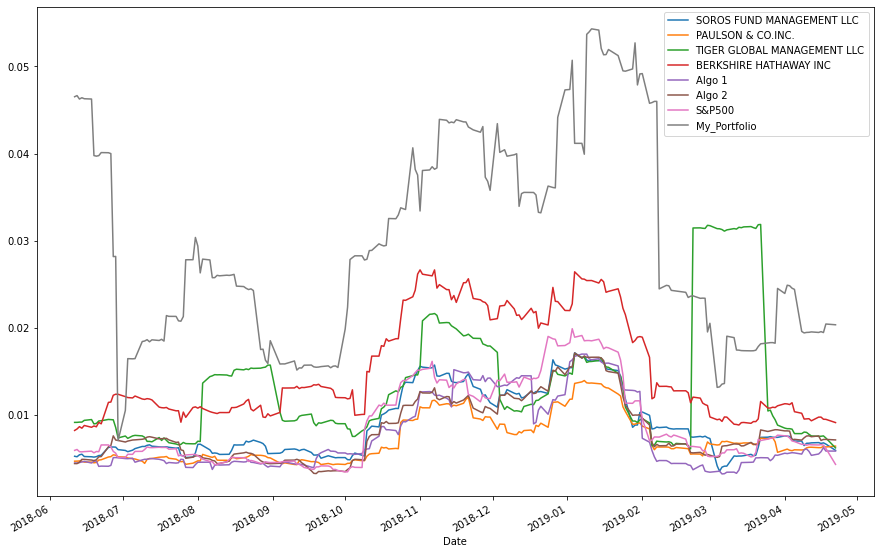

In [86]:
# Calculating rolling standard deviation.
npr_rolling_21day_std = new_portfolio_returns.rolling(window=21).std()

# Plotting rolling standard deviation.
npr_rolling_21day_std.plot(figsize=(15,10));

### Calculate and plot the correlation

In [87]:
# Calculating the correlation.
npr_correlation = new_portfolio_returns.corr()
npr_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,My_Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.791255,0.477128,0.816175,0.337373,0.862280,-0.027942,0.071516
PAULSON & CO.INC.,0.791255,1.000000,0.484877,0.650265,0.360579,0.783838,-0.059995,0.034982
TIGER GLOBAL MANAGEMENT LLC,0.477128,0.484877,1.000000,0.324043,0.113381,0.408322,0.005712,0.016672
BERKSHIRE HATHAWAY INC,0.816175,0.650265,0.324043,1.000000,0.326374,0.782081,-0.038651,0.031056
Algo 1,0.337373,0.360579,0.113381,0.326374,1.000000,0.364297,-0.054752,-0.019743
Algo 2,0.862280,0.783838,0.408322,0.782081,0.364297,1.000000,-0.042678,0.015552
S&P500,-0.027942,-0.059995,0.005712,-0.038651,-0.054752,-0.042678,1.000000,0.471895
My_Portfolio,0.071516,0.034982,0.016672,0.031056,-0.019743,0.015552,0.471895,1.000000


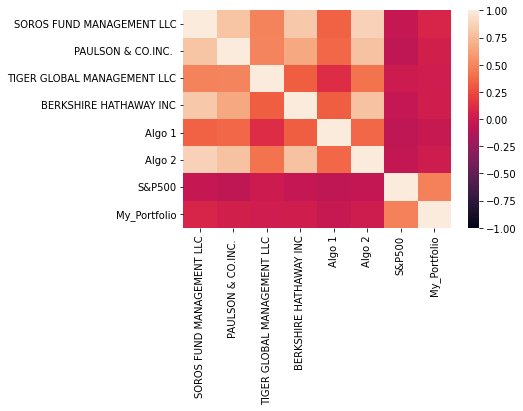

In [88]:
# Plotting the correlation.
sns.heatmap(npr_correlation, vmin=-1, vmax=1);

### Calculate and Plot Rolling 60-day Beta for the Custom Portfolio compared to the S&P 500

In [89]:
# Calculating the 60-day rolling covariance of My Portfolio vs. S&P 500.
rolling_covariance = new_portfolio_returns['My_Portfolio'].rolling(window=60).cov(new_portfolio_returns['S&P500'])
rolling_covariance.dropna(inplace=True)
rolling_covariance

Date
2018-08-06    0.000106
2018-08-07    0.000106
2018-08-08    0.000104
2018-08-09    0.000102
2018-08-10    0.000102
                ...   
2019-04-15    0.000019
2019-04-16    0.000010
2019-04-17    0.000010
2019-04-18    0.000011
2019-04-22    0.000010
Length: 177, dtype: float64

In [90]:
# Calculating the 60-day rolling variance of My Portfolio vs. S&P 500.
rolling_variance = new_portfolio_returns['S&P500'].rolling(window=60).var()
rolling_variance.dropna(inplace=True)
rolling_variance

Date
2018-08-06    0.000031
2018-08-07    0.000031
2018-08-08    0.000030
2018-08-09    0.000031
2018-08-10    0.000031
                ...   
2019-04-15    0.000041
2019-04-16    0.000037
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
Name: S&P500, Length: 177, dtype: float64

In [91]:
# Calculating the 60-day rolling beta of My Portfolio compared to the S&P 500
rolling_60_beta = rolling_covariance / rolling_variance
rolling_60_beta

Date
2018-08-06    3.461007
2018-08-07    3.463314
2018-08-08    3.505987
2018-08-09    3.336676
2018-08-10    3.314792
                ...   
2019-04-15    0.454840
2019-04-16    0.275390
2019-04-17    0.275108
2019-04-18    0.283548
2019-04-22    0.278064
Length: 177, dtype: float64

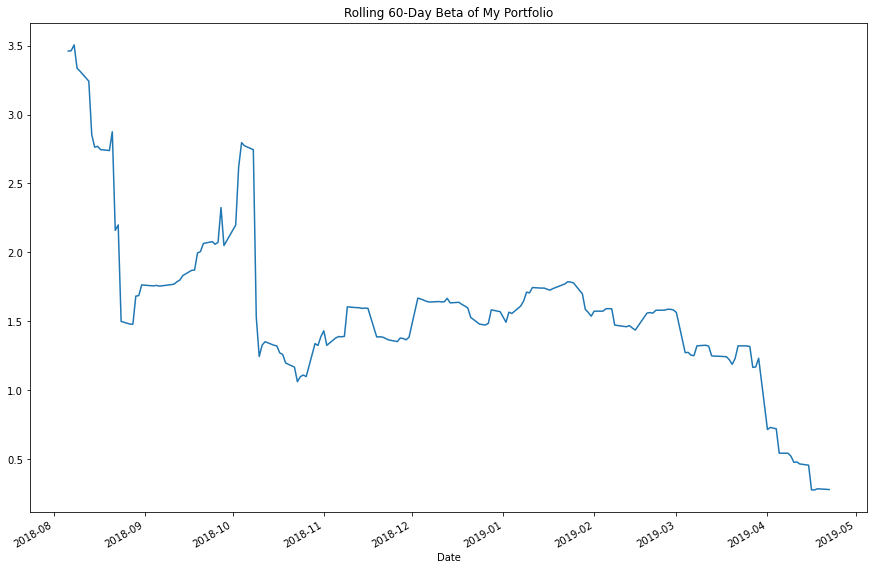

In [92]:
# Plotting Beta.
rolling_60_beta.plot(figsize=(15, 10), title='Rolling 60-Day Beta of My Portfolio');

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [93]:
# Joining my returns DataFrame to the original returns DataFrame which includes the Risk Free Rate.
new_portfolio_returns_with_rf_rate = pd.concat([jpr_with_rf_rate, my_portfolio_returns], axis="columns", join="inner")
new_portfolio_returns_with_rf_rate

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,rf_rate,My_Portfolio
Date,,,,,,,,,
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,0.000209,-0.000012
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.000211,0.010216
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,0.000210,-0.009283
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.000209,0.001618
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,0.000209,0.006112
...,...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.000264,-0.000326
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.000264,-0.009149
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.000266,-0.001541


In [94]:
# Calculating Annualzied Sharpe Ratios.
npr_sharpe_ratios = ((new_portfolio_returns_with_rf_rate.mean()-new_portfolio_returns_with_rf_rate['rf_rate'].mean()) * 252) / (new_portfolio_returns_with_rf_rate.std() * np.sqrt(252))
# Determining which portfolios are riskier than the S&P 500.
npr_sharpe_ratios = npr_sharpe_ratios.sort_values(ascending=False)
npr_sharpe_ratios

Algo 1                         1.549596
SOROS FUND MANAGEMENT LLC      0.070860
rf_rate                        0.000000
BERKSHIRE HATHAWAY INC        -0.044254
PAULSON & CO.INC.             -0.185608
Algo 2                        -0.257271
S&P500                        -0.845288
My_Portfolio                  -1.311734
TIGER GLOBAL MANAGEMENT LLC   -1.327997
dtype: float64

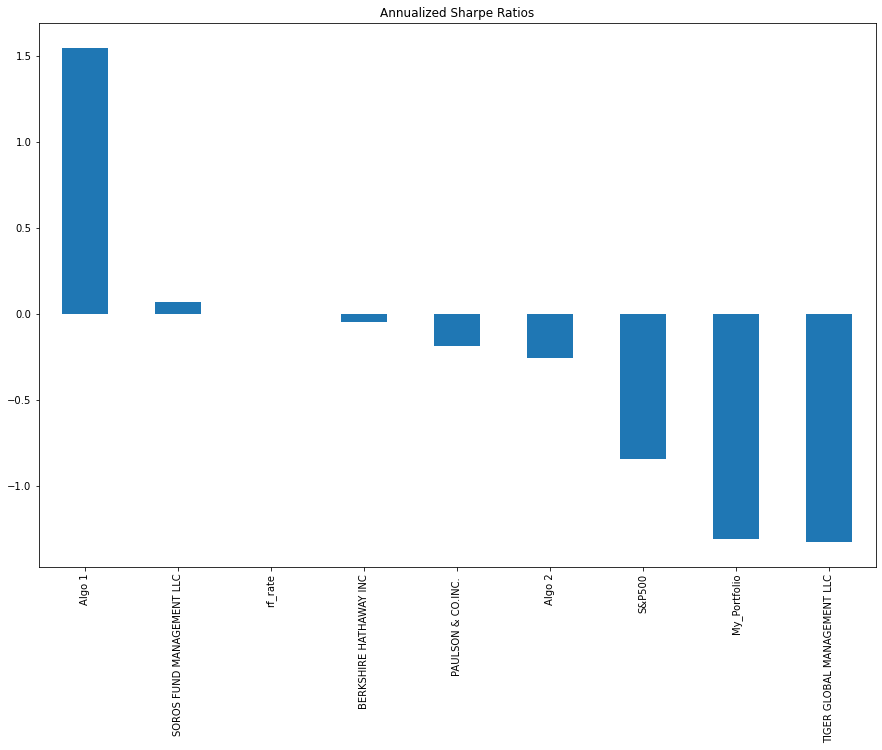

In [95]:
# Visualize the sharpe ratios as a bar plot
npr_sharpe_ratios.plot(figsize=(15,10), kind="bar", title="Annualized Sharpe Ratios");

In [96]:
# Calculating the average return.
new_portfolio_returns.mean().sort_values(ascending=False)*100

Algo 1                         0.107427
SOROS FUND MANAGEMENT LLC      0.019226
PAULSON & CO.INC.              0.011341
BERKSHIRE HATHAWAY INC         0.007385
Algo 2                         0.001161
S&P500                        -0.025447
TIGER GLOBAL MANAGEMENT LLC   -0.096194
My_Portfolio                  -0.244274
dtype: float64

### How does the custom portfolio do?

My portfolio has a negative sharpe ratio which means that the expected return is lower than the risk free rate. The expected return is negative, which also means that this portfolio is underperforming when compared to the S&P 500 market. In fact, if we had invested money in this portfolio, during this time period , we would have actually lost money.